# Description

## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.


# Objective

To predict which customer is more likely to purchase the newly introduced travel package.


# Data Dictionary


## Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Product taken flag
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisited: Total number of person came with customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of the trip in a year by customer
- Passport: The customer has passport or not
- OwnCar: Customers owns a car flag
- NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## Customer interaction data: 

PitchSatisfactionScore: Sales pitch satisfactory score
ProductPitched: Product pitched by a salesperson
NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
DurationOfPitch: Duration of the pitch by a salesman to customer

## Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)

## Submission Guidelines :

There are two parts to the submission: 
A well commented Jupyter notebook [format - .ipynb]
File converted to HTML format 
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
Happy Learning!!

In [149]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [150]:
tour_data = pd.read_excel("Tourism.xlsx",sheet_name="Tourism")

In [151]:
# View first five rows of dataframe to check whether excel sheet is loaded or not
tour_data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
# To check data types of each columns
tour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

#### Observation
- Total no of columns in the dataset is 20. 7 columns are int, 6 columns are Object & 7 are float. 
- Total no of rows is 4888.

In [5]:
# Code to understand null values in the data.
tour_data.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

#### Observation 
There are a few columns containing null values such as Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisited & MonthlyIncome

In [6]:
# Statistical summary of the data.
tour_data[['CustomerID','ProdTaken','Age',
            'CityTier','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups',
            'PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar',
            'NumberOfChildrenVisited','MonthlyIncome']].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0


#### Observation
- Customer ID column contain unique value for each customer.
- ProdTaken appears to be boolean. 0 for No, and 1 for Yes.
- Avg age is over 37 and median is 31. Std deviation of 9 indicates that Age is spread. 
- City Tier ranges from 1 to 3. 
- DurationofPitch max is 127 and min of 5mins. Median is 13mins indicates that Salesman has spent has had a chance from customer to establish a communication with the customer.
- No of person visited min of 1 and max of 5. 
- Customer preferred a min of 3 star hotel accomodation 
- Passport seems to be a boolean flag - 0 or 1.
- Satisfaction score ranges from 1 to 5. Avg score is 3.
- OwnCar seems to be a boolean flag - 0 or 1.
- NumberOfChildrenVisited ranges from 0 to 3. Avg of 1 children.
- MonthlyIncome avg is 23K, min is 1K and Max is 98K.




In [7]:
tour_data.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

#### Observation
- Customer id seems to be unique which will not add value to the model hence it can be dropped.

In [8]:
#Dropping customer id column as it's continous numerical variable.
tour_data.drop(columns='CustomerID',axis=0, inplace=True)

In [9]:
tour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4888 non-null   int64  
 1   Age                      4662 non-null   float64
 2   TypeofContact            4863 non-null   object 
 3   CityTier                 4888 non-null   int64  
 4   DurationOfPitch          4637 non-null   float64
 5   Occupation               4888 non-null   object 
 6   Gender                   4888 non-null   object 
 7   NumberOfPersonVisited    4888 non-null   int64  
 8   NumberOfFollowups        4843 non-null   float64
 9   ProductPitched           4888 non-null   object 
 10  PreferredPropertyStar    4862 non-null   float64
 11  MaritalStatus            4888 non-null   object 
 12  NumberOfTrips            4748 non-null   float64
 13  Passport                 4888 non-null   int64  
 14  PitchSatisfactionScore  

## Perform an Exploratory Data Analysis on the data
- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive

In [147]:
#Create a list with columns that categorical values
cat_cols=['ProdTaken', 'TypeofContact','CityTier','Occupation','Gender',
          'NumberOfPersonVisited', 'NumberOfFollowups', 'ProductPitched',
          'PreferredPropertyStar', 'MaritalStatus','Passport','PitchSatisfactionScore',
          'OwnCar','NumberOfChildrenVisited','Designation']


#Create a list with columns that numerical values
num_cols = ['Age', 'DurationOfPitch','MonthlyIncome']

In [191]:
# Function to plot univariate graph for Categorical Columns.
def categorical_unigraphs(features):
    for i in tour_data[features].columns:
        #sns.barplot(tour_data[i].value_counts().index,tour_data[i].value_counts()).set_title(i)
        graph = sns.barplot(tour_data[i].value_counts().index,
                    (tour_data[i].value_counts()/len(tour_data)*100)).set_title(i)
        plt.ylim(0,100)
        plt.show()

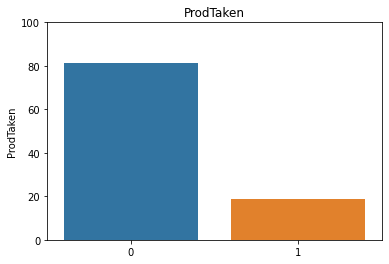

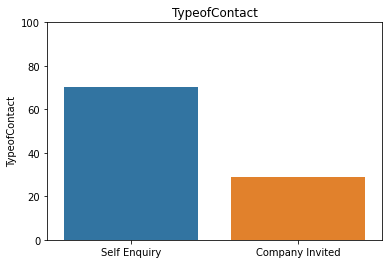

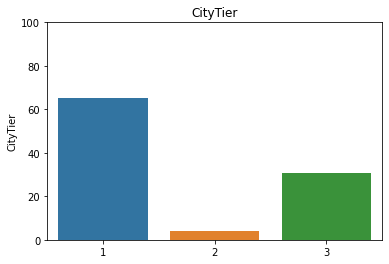

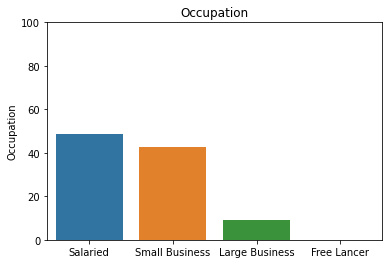

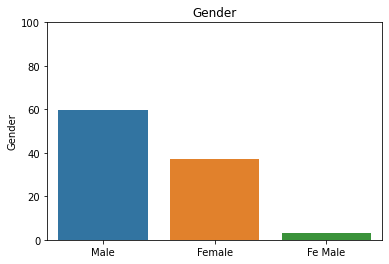

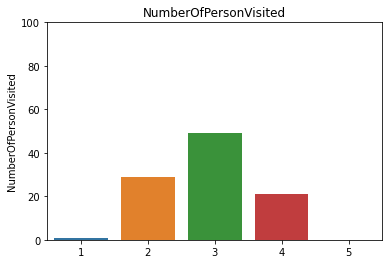

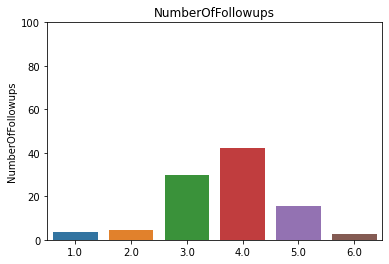

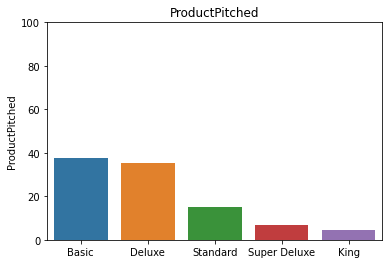

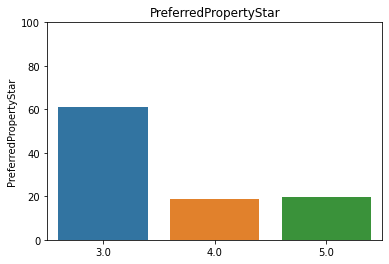

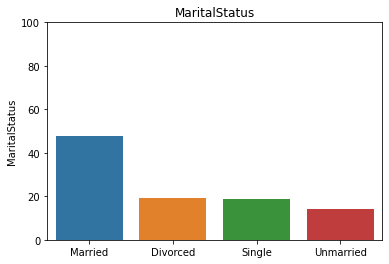

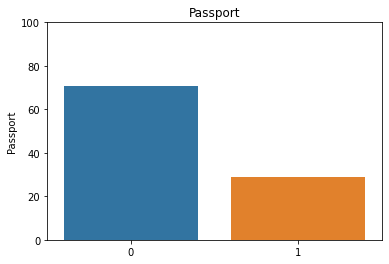

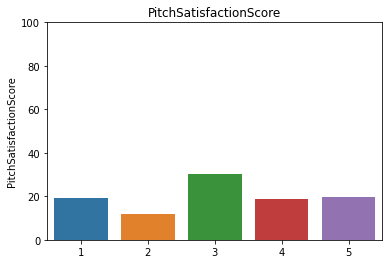

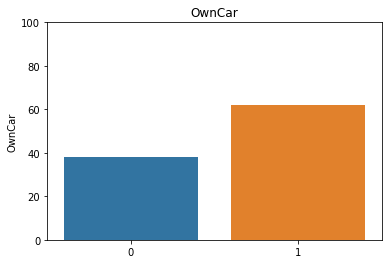

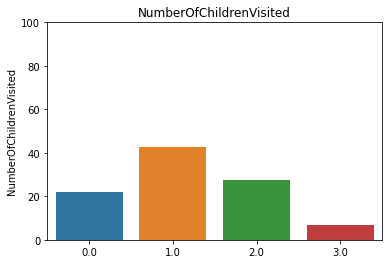

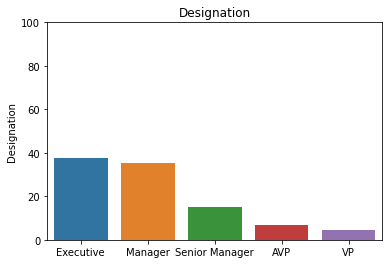

In [192]:
categorical_unigraphs(cat_cols)

Observations
-	80% of customers didn’t take the product. 
-	70% of customers have made self-enquiry.
-	More than 60% of customers are in city tier 1
-	More than 80% of customers are either salaried or small business owners
-	Almost 60% of customers in the database are male.
-	No of persons visited is 3 is around 50% of the customers. 
-	More than 40% of the time, sales rep have done 4 follow ups.
-	Basic and Deluxe is product pitched almost 80% of times by sales pitched.
-	Almost 60% of customers prefer 3.0 star hotel.
-	More than 40% of customers are in the database are married.
-	Around 70% of customers have a passport.
-	Pitchsatisfaction score on is around 3 for around 30%, and rest of the scores on an average is evenly distributed. 
-	Around 60% of customers  own a car.
-	More than 70% of customers are either Executives or Managers. 


In [13]:
# Univariate analysis for Continous Columns.
def continous_unigraphs(features):
    for i in tour_data[features].columns:
        sns.boxplot(tour_data[i], showmeans=True)
        plt.show()
        sns.histplot(data=tour_data, x= i , kde=True)
        plt.show()

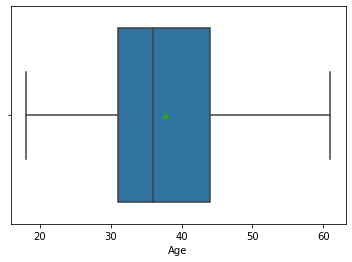

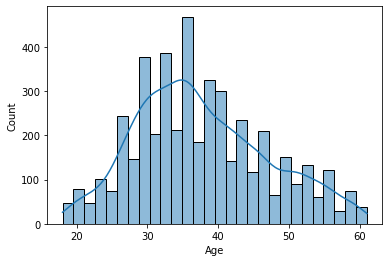

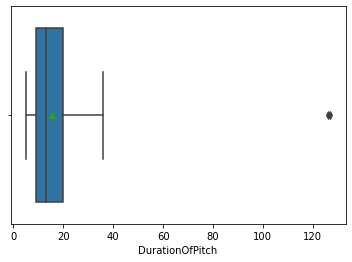

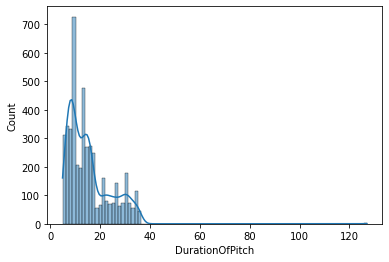

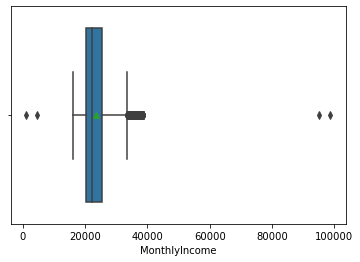

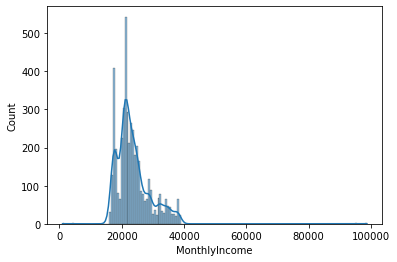

In [14]:
# Call function to print univariate graphs for continous features .
continous_unigraphs(num_cols)

Observations
-	Age seems to be almost evenly distributed 
-	Duration of pitch has outlier more than 120
-	Monthly income has outlier around less than 10K and  greater than 80K


In [15]:
#Bivariate analysis of the data
def prodtaken_bivariate(feature):
    total = tour_data.groupby(by=feature)['ProdTaken'].count().reset_index()
    ProdTaken_Yes = (tour_data[tour_data['ProdTaken']==1]).groupby(by=feature)['ProdTaken'].count().reset_index()

    #print(total)
    bar1 = sns.barplot(x= feature,  y='ProdTaken', data=total, color='darkblue')
    bar2 = sns.barplot(x=feature, y='ProdTaken', data=ProdTaken_Yes, color='lightblue')

    
    top_bar = mpatches.Patch(color='darkblue', label='ProdTaken = No')
    bottom_bar = mpatches.Patch(color='lightblue', label='ProdTaken = Yes')
    plt.legend(handles=[top_bar, bottom_bar])
    plt.show()

TypeofContact


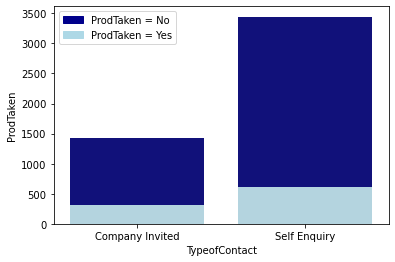

CityTier


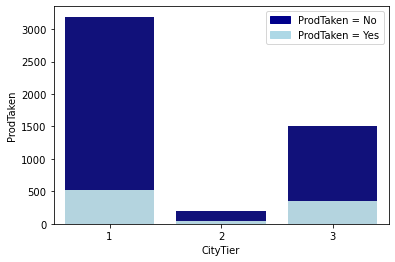

Occupation


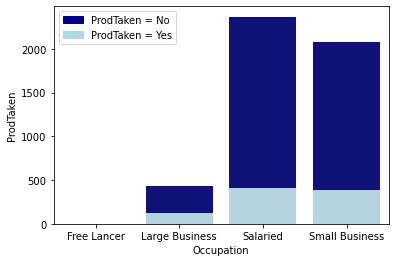

Gender


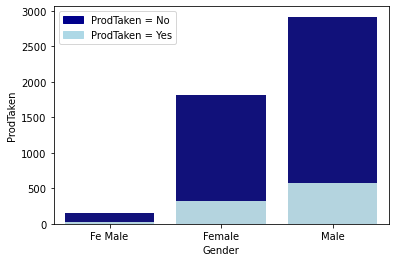

NumberOfPersonVisited


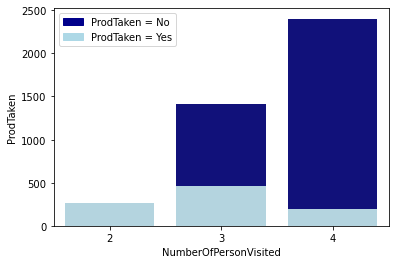

NumberOfFollowups


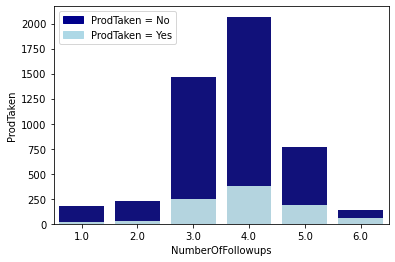

ProductPitched


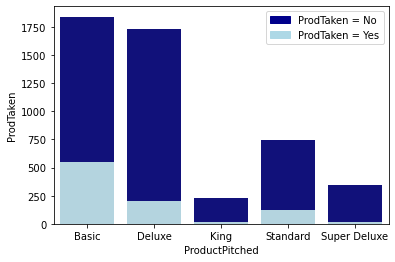

PreferredPropertyStar


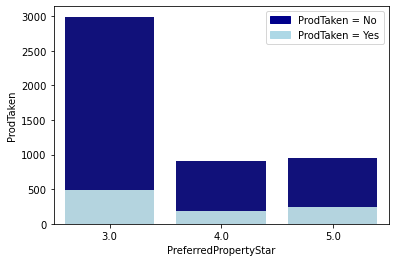

MaritalStatus


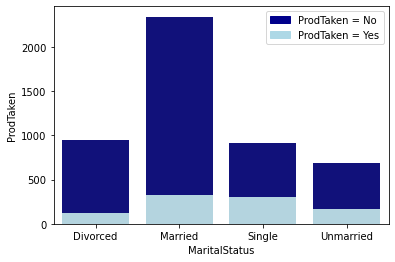

Passport


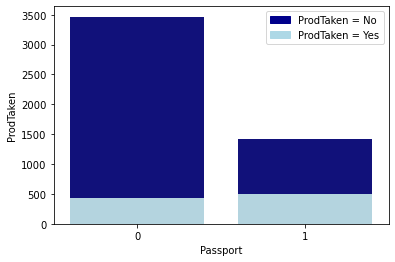

PitchSatisfactionScore


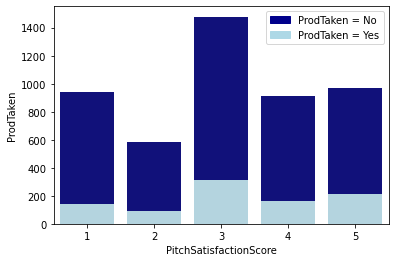

OwnCar


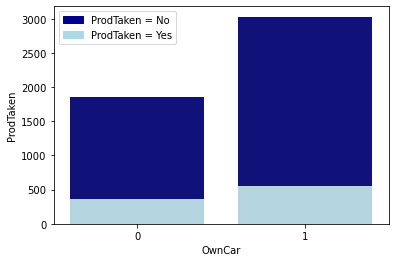

NumberOfChildrenVisited


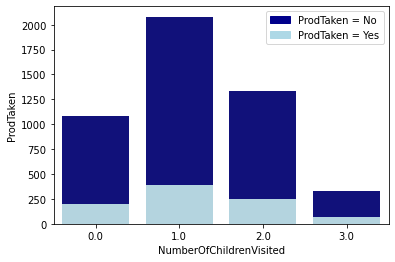

Designation


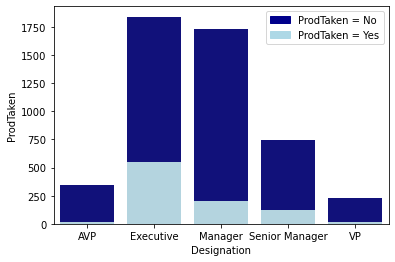

In [16]:
# Iterate each category columns to print bivariate graph.
for i in tour_data[cat_cols].columns:
    if i != 'ProdTaken':
        print(i)
        prodtaken_bivariate(i)

Observations
-	More customers tend to take product when they self enquire.
-	1 and 3 city tier have taken product compared to city tier 2. City tier 2 is a segment that needs more focused campaign
-	More people in salaried and small business have taken product compared to than large business and freelancing
-	Male has taken product higher than female. 
-	When follows are done 3 or more times, customers tend to take product. 
-	Most customers have taken basic product 
-	Interestingly, product taken by customers have almost even distribution of holding passport or not.
-	Pitch satisfaction score is 3 or more when customer take product.
-	Executive designation customer have taken product more than customer with other designation.


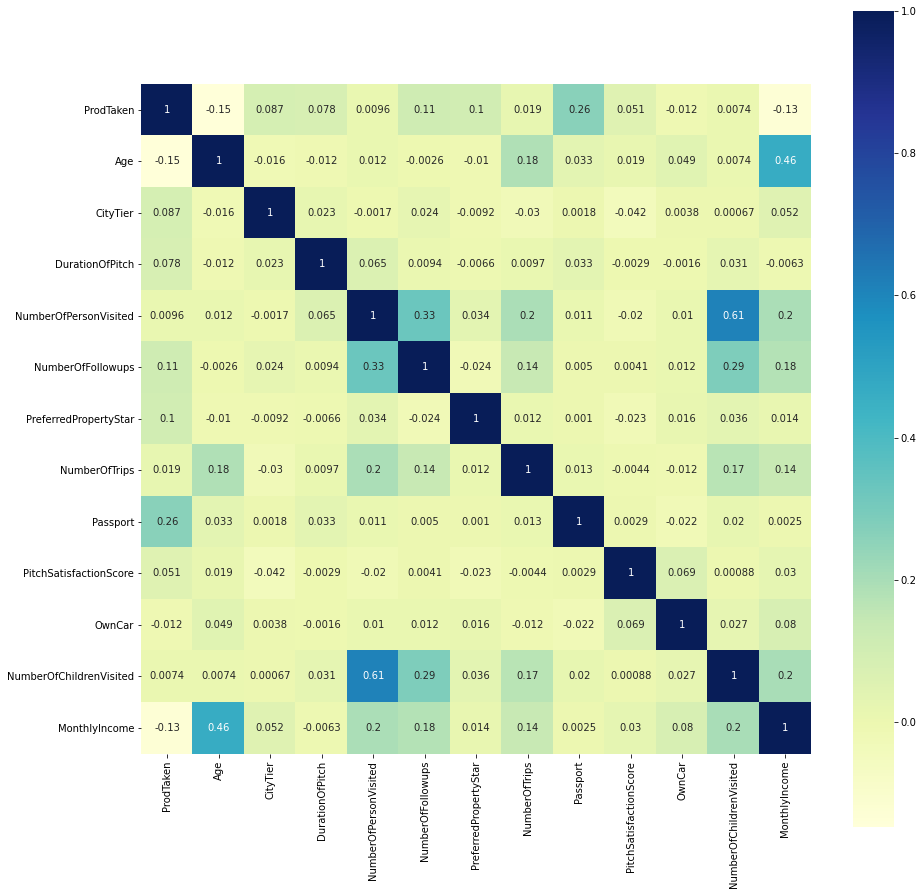

In [17]:
# Print correlation graph
plt.figure(figsize=(15,15))
sns.heatmap(tour_data.corr(),annot=True, cmap="YlGnBu", square=True);

Observation
- No of personvisited has higher correlation with No of children visited. 
- Age and monthly income seems to have second higher correlation.
- It's appears that there is not much to correlate product taken with features. 

Data Pre-processing
- Prepare the data for analysis - Missing value Treatment, Outlier Detection (treat, if needed- why or why not ), Feature Engineering, Prepare data for modeling

In [18]:
# Code to find out null values in each columns
tour_data.isna().sum()

ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [19]:
#Remove rows that have type of contact as null. There are only 25 rows which will not impact predication.
tour_data = tour_data[tour_data['TypeofContact'].notnull()]

#Assigning Age, DurationOfPitch, MonthlyIncome with mean 
tour_data['Age'].fillna(value=tour_data['Age'].mean(), inplace=True)
tour_data['DurationOfPitch'].fillna(value=tour_data['DurationOfPitch'].mean(), inplace=True)
tour_data['MonthlyIncome'].fillna(value=tour_data['MonthlyIncome'].mean(), inplace=True)

#Creating a SimpleImputer Object with a strategy to assign most frequent value to impute categorial columns.
imp = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
transformed_data = pd.DataFrame(imp.fit_transform(tour_data))
transformed_data.columns = tour_data.columns
transformed_data.index = tour_data.index

#Assigning imputed i.e. Transformed Data to original dataframe i.e. tour_data
tour_data = transformed_data

In [20]:
#Outlier Imputation Function.
def outlier_imputation(df,feature):
   # tour_data.head()
    q1 = df[feature].quantile(0.25) #first quartile value
    q3 = df[feature].quantile(0.75) # third quartile value
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr #acceptable range
    high = q3+1.5*iqr #acceptable range
    df = df[(tour_data[feature] >= low) & (df[feature] <= high)] # meeting the acceptable range
    return df

Before Imputatation Box Chart


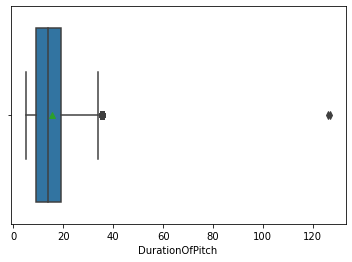

Post Imputatation Box Chart


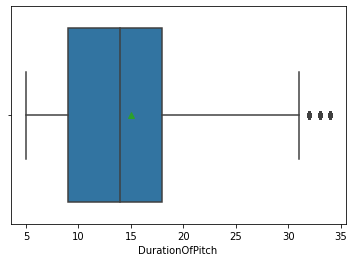

In [21]:
# Removing outlier in DurationOfPitch as it not going as it's a one off case.
print("Before Imputatation Box Chart")
sns.boxplot(tour_data['DurationOfPitch'], showmeans=True)
plt.show()
tour_data = outlier_imputation(tour_data,'DurationOfPitch')
print("Post Imputatation Box Chart")
sns.boxplot(tour_data['DurationOfPitch'], showmeans=True)
plt.show()

Before Imputatation Box Chart


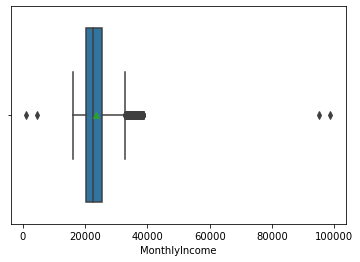

Post Imputatation Box Chart


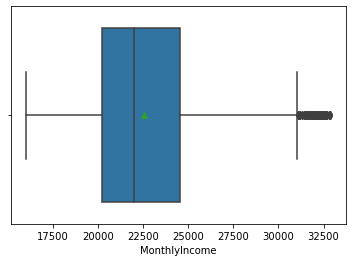

In [22]:
# Removing outlier in DurationOfPitch as it not going as it's a due to significatly low population and extermely out of iqr.
print("Before Imputatation Box Chart")
sns.boxplot(tour_data['MonthlyIncome'], showmeans=True)
plt.show()
tour_data = outlier_imputation(tour_data,'MonthlyIncome')
print("Post Imputatation Box Chart")
sns.boxplot(tour_data['MonthlyIncome'], showmeans=True)
plt.show()

In [23]:
# Creating a dictionary to replace str values with categorical number values.
replaceStruct = {
                "TypeofContact": {"Self Enquiry": 1, "Company Invited": 2},
                "Occupation": {"Salaried": 1, "Small Business":2 , "Large Business": 3, "Free Lancer": 4},
                "Gender": {"Male": 1, "Female":2 , "Fe Male": 2},
                "ProductPitched": {"Basic": 1, "Standard": 2 ,"Deluxe": 3 ,"Super Deluxe": 4 ,"King": 5}
                }

# Creating a list to create column based on categorical value.
oneHotCols=['MaritalStatus','Designation']

In [24]:
# Replace dataframe structure with dictionary created above
tour_data=tour_data.replace(replaceStruct)

# Replace MaritalStatus and Designation by creating column with categorical values (0 or 1) instead of string values
tour_data=pd.get_dummies(tour_data, columns=oneHotCols)
tour_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4389 entries, 0 to 4887
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ProdTaken                   4389 non-null   object
 1   Age                         4389 non-null   object
 2   TypeofContact               4389 non-null   int64 
 3   CityTier                    4389 non-null   object
 4   DurationOfPitch             4389 non-null   object
 5   Occupation                  4389 non-null   int64 
 6   Gender                      4389 non-null   int64 
 7   NumberOfPersonVisited       4389 non-null   object
 8   NumberOfFollowups           4389 non-null   object
 9   ProductPitched              4389 non-null   int64 
 10  PreferredPropertyStar       4389 non-null   object
 11  NumberOfTrips               4389 non-null   object
 12  Passport                    4389 non-null   object
 13  PitchSatisfactionScore      4389 non-null   obje

In [25]:
#Converting object dtypes to int where type is object.
for feature in tour_data.columns: # Loop through all columns in the dataframe
    if tour_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        tour_data[feature] =  tour_data[feature].astype(int)
tour_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4389 entries, 0 to 4887
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ProdTaken                   4389 non-null   int64
 1   Age                         4389 non-null   int64
 2   TypeofContact               4389 non-null   int64
 3   CityTier                    4389 non-null   int64
 4   DurationOfPitch             4389 non-null   int64
 5   Occupation                  4389 non-null   int64
 6   Gender                      4389 non-null   int64
 7   NumberOfPersonVisited       4389 non-null   int64
 8   NumberOfFollowups           4389 non-null   int64
 9   ProductPitched              4389 non-null   int64
 10  PreferredPropertyStar       4389 non-null   int64
 11  NumberOfTrips               4389 non-null   int64
 12  Passport                    4389 non-null   int64
 13  PitchSatisfactionScore      4389 non-null   int64
 14  OwnCar  

In [26]:
# Creating X with Target Variable and creating y with target variable.
tour_data_copy = tour_data
X = tour_data.drop("ProdTaken" , axis=1)
y = tour_data.pop("ProdTaken")

In [27]:
# Splitting Train and Test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [28]:
# Function to get metric score
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [119]:
#function to create confusion matrix and to create confusion matrix heatmap.
    
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
  #  print(type(y_predict))
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Yes", "Actual - No"]],
                  columns = [i for i in ['Predicted - Yes', 'Predicted - No']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model building - Bagging
- Build bagging classifier, random forest, and decision tree.

In [86]:
# Creating bagging classifer and fitting training data
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [87]:
# Getting metric score of the classifer
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9934895833333334
Accuracy on test set :  0.9043280182232346
Recall on training set :  0.9701986754966887
Recall on test set :  0.6245059288537549
Precision on training set :  0.9965986394557823
Precision on test set :  0.8359788359788359


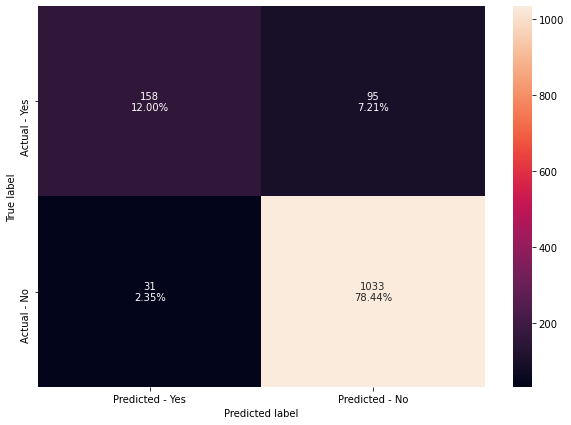

In [120]:
# Creating Confusion Matrix (CM) for the Classifer
make_confusion_matrix(bagging_estimator,y_test)

In [194]:
# Creating random forest classifer and fitting training data
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [34]:
# Getting metric score of the classifer
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9066059225512528
Recall on training set :  1.0
Recall on test set :  0.5691699604743083
Precision on training set :  1.0
Precision on test set :  0.9113924050632911


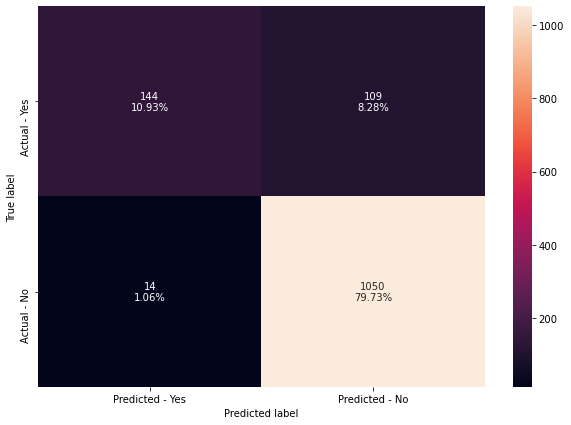

In [35]:
#Creating confusion matrix for the classifer
make_confusion_matrix(rf_estimator,y_test)

In [36]:
# Tuning classifer using grid search CV
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [89]:
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9039713541666666
Accuracy on test set :  0.8549734244495064
Recall on training set :  0.5579470198675497
Recall on test set :  0.3715415019762846
Precision on training set :  0.9232876712328767
Precision on test set :  0.746031746031746


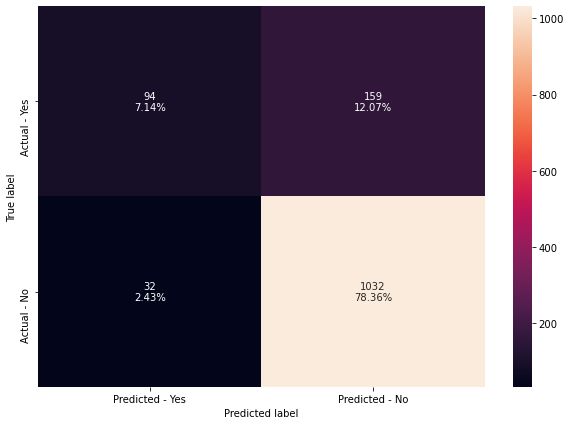

In [121]:
make_confusion_matrix(rf_estimator_tuned,y_test)

In [122]:
# Creating decision tree classifer and fitting training data
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
dTree

DecisionTreeClassifier(random_state=1)

In [123]:
dtree_estimator_score=get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8959757023538345
Recall on training set :  1.0
Recall on test set :  0.782608695652174
Precision on training set :  1.0
Precision on test set :  0.7071428571428572


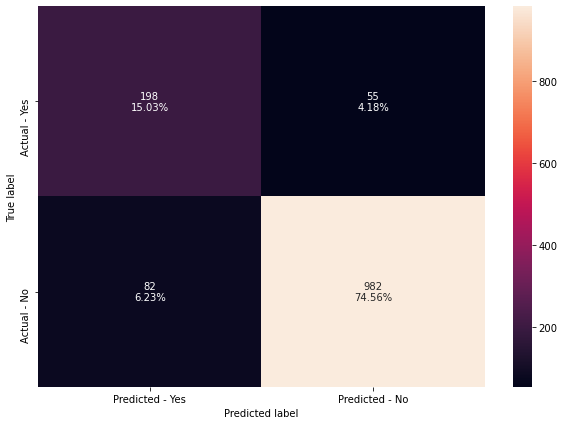

In [41]:
make_confusion_matrix(dTree,y_test)

Model performance improvement - Bagging
- Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment

In [92]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=40,
                  random_state=1)

In [93]:
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9934895833333334
Accuracy on test set :  0.9043280182232346
Recall on training set :  0.9701986754966887
Recall on test set :  0.6245059288537549
Precision on training set :  0.9965986394557823
Precision on test set :  0.8359788359788359


<class 'numpy.ndarray'>


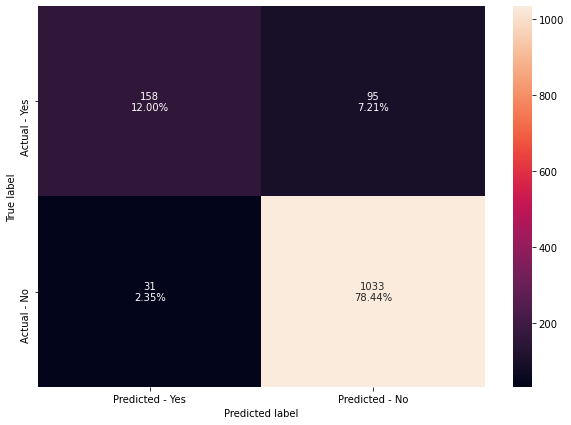

In [94]:
make_confusion_matrix(bagging_estimator,y_test)

Model building - Boosting
- Build Adaboost, gradient boost, xgboost, and stacking classifier

In [102]:
# Creating Adaptive boosting classifer and fitting training data
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [103]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8518880208333334
Accuracy on test set :  0.835990888382688
Recall on training set :  0.3708609271523179
Recall on test set :  0.33201581027667987
Precision on training set :  0.7491638795986622
Precision on test set :  0.6412213740458015


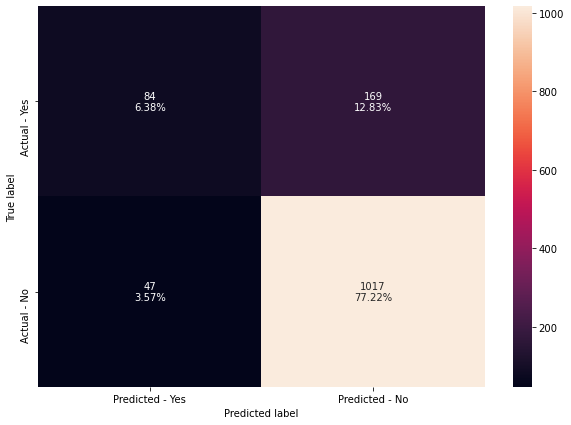

In [124]:
make_confusion_matrix(abc,y_test)

In [105]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "n_estimators": [100,200],
    "learning_rate":[0.001, 0.01, 0.1, 0.2, 0.4]
}


# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2, n_estimators=200, random_state=1)

In [106]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.8460286458333334
Accuracy on test set :  0.8413059984813971
Recall on training set :  0.3029801324503311
Recall on test set :  0.2964426877470356
Precision on training set :  0.7787234042553192
Precision on test set :  0.7075471698113207


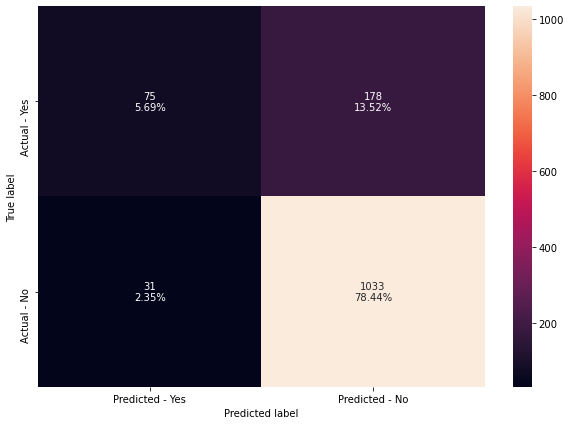

In [125]:
make_confusion_matrix(abc_tuned,y_test)

In [126]:
# Creating gradient boosting classifer and fitting training data
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [127]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8899739583333334
Accuracy on test set :  0.856492027334852
Recall on training set :  0.5132450331125827
Recall on test set :  0.391304347826087
Precision on training set :  0.8757062146892656
Precision on test set :  0.7388059701492538


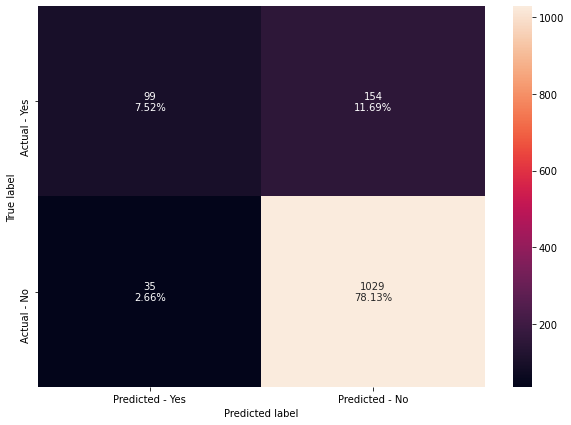

In [128]:
make_confusion_matrix(gbc,y_test)

In [112]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

parameters = {
    "n_estimators": [100,200],
    "learning_rate":[0.001, 0.01, 0.1, 0.2, 0.4]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, n_estimators=200, random_state=1)

In [129]:
abc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9837239583333334
Accuracy on test set :  0.8959757023538345
Recall on training set :  0.9288079470198676
Recall on test set :  0.6126482213438735
Precision on training set :  0.9876760563380281
Precision on test set :  0.7989690721649485


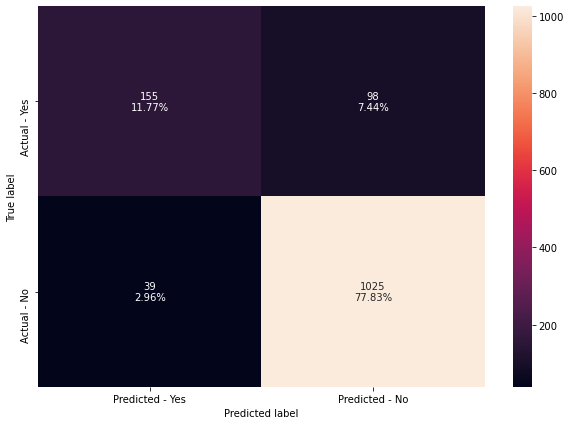

In [130]:
make_confusion_matrix(gbc_tuned,y_test)

In [115]:
# Creating XG boosting classifer and fitting training data
warnings.filterwarnings(action='ignore')
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

[08:44:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9996744791666666
Accuracy on test set :  0.929384965831435
Recall on training set :  0.9983443708609272
Recall on test set :  0.7193675889328063
Precision on training set :  1.0
Precision on test set :  0.8921568627450981


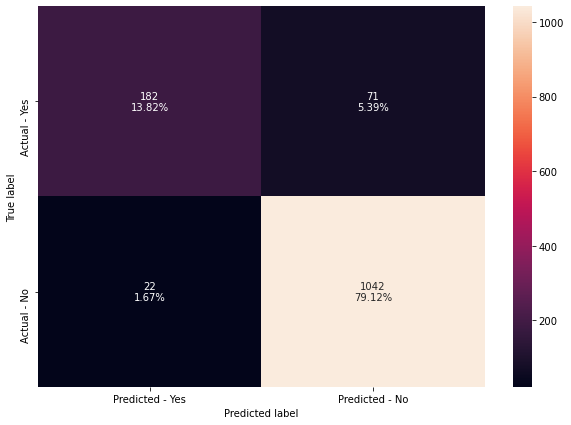

In [32]:
make_confusion_matrix(xgb,y_test)

In [ ]:
np.arange(10,100,20)

In [98]:
# Choose the type of classifier. 
warnings.filterwarnings("ignore")
xgb_tuned = XGBClassifier(random_state=1)

#parameters = {
#    "n_estimators": np.arange(10,100,20),
#    "scale_pos_weight":[0,1,2,5],
#    "subsample":[0.5,0.7,0.9,1],
#    "learning_rate":[0.01,0.1,0.2,0.05],
#    "gamma":[0,1,3],
#    "colsample_bytree":[0.5,0.7,0.9,1],
#    "colsample_bylevel":[0.5,0.7,0.9,1]
#}

parameters = {
    "n_estimators": [100,200],
    "learning_rate":[0.001, 0.01, 0.1, 0.2, 0.4]
}

#parameters = {
#        'min_child_weight': [1, 5, 10],
#        'gamma': [0.5, 1, 1.5, 2, 5],
#        'subsample': [0.6, 0.8, 1.0],
#        'colsample_bytree': [0.6, 0.8, 1.0],
#        'max_depth': [3, 4, 5]
#        }


grid_obj = GridSearchCV(xgb_tuned, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

xgb_tuned = grid_obj.best_estimator_

xgb_tuned.fit(X_train, y_train)

[08:03:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[08:03:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:03:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9202733485193622
Recall on training set :  1.0
Recall on test set :  0.691699604743083
Precision on training set :  1.0
Precision on test set :  0.8663366336633663


<class 'numpy.ndarray'>


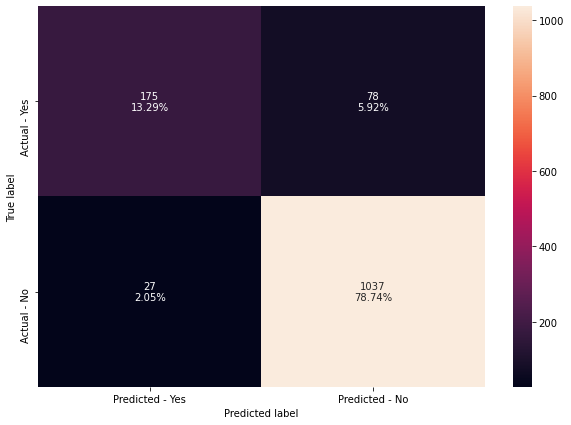

In [100]:
make_confusion_matrix(xgb_tuned,y_test)

Model performance evaluation
- Evaluate the model on different performance metrics and comment on the performance and scope of improvement

In [138]:
# defining list of models
models = [bagging_estimator, bagging_estimator_tuned, rf_estimator, rf_estimator_tuned,dTree, abc, abc_tuned, gbc, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    #print(type(model))
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [139]:
comparison_frame = pd.DataFrame({'Model':['Bagging Classifier', 'Bagging Classifier Tuned',
                                          'Random Forest', 'Random Forest Tuned', 'Decision Tree',
                                          'AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting Tuned',
                                          'XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging Classifier,0.99,0.90,0.97,0.62,1.00,0.84
1,Bagging Classifier Tuned,1.00,0.92,1.00,0.65,1.00,0.92
2,Random Forest,1.00,0.91,1.00,0.57,1.00,0.91
3,Random Forest Tuned,0.90,0.85,0.56,0.37,0.92,0.75
4,Decision Tree,1.00,0.90,1.00,0.78,1.00,0.71
5,AdaBoost with default paramters,0.85,0.84,0.37,0.33,0.75,0.64
6,AdaBoost Tuned,0.85,0.84,0.30,0.30,0.78,0.71
7,Gradient Boosting with default parameters,0.89,0.86,0.51,0.39,0.88,0.74
8,Gradient Boosting Tuned,0.98,0.90,0.93,0.61,0.99,0.80
9,XGBoost with default parameters,1.00,0.93,1.00,0.72,1.00,0.89


Comment on which metric is right for model performance evaluation and why? - Comment on model performance - Can model performance be improved? check and comment

A. Precision is right metric for model. The objective of this product is to understand when a product is introduced what percentage of customers is like to take that. This is a critical metric for the company to determine whether is worth to invest and develop a product or not. If there is not much interest with the customers, there is no point making such as a investment to develop the product. We simply care about what is the potential hence false positives (i.e. customer predicted to take the product but didnt take it) is not something to be too concerned but rather the potential it can generate. Hence precision is a right metric. Obiviously we need to check on Accuracy in order to make sure that model is not overfitted too much.

B. As described above, considering precision is a metric that needs to be looked upon along with other metrics such as Accuracy and Recall. Performance of Bagging Classifer tuned, Random Forest and XG Boost tuned model can be good a model to predict this problem. Other models tend to overfit and/or higher recall rates compared to these models.

C. Model performance can defintiely be improved however lack of computer power with the PC is limited. I have to reduced by hypertuning parameters for certain classifers such as XG Boost as it takes too much computation power and takes very long time to run.

Actionable Insights & Recommendations
- Conclude with the key takeaways for the business - What would your advice be to grow the business?

In [ ]:
There is a potentiatial with the customer base to take new product. The business case is there to invest new product.